# Bracketing Method
## bracket minimum method

In [1]:
using Plots

In [7]:
function bracket_minimum(f; x=0, step=1e-2, k=1.2, iterMax=30)
    procedure = []
    
    a, fa = x, f(x)
    b, fb = x+step, f(x+step)
    # choose left bound
    if fa < fb
        a, b = b, a
        fa, fb = fb, fa
        step = -step
    end
    
    # choose right bound
    iterCount = 0
    while true
        iterCount += 1
        tempList = []
        c, fc = b+step, f(b+step)
        
        ###
        push!(tempList, [["a", a, fa], ["b", b, fb], ["c", c, fc]])
        ###
        
        # if c is on the right
        if (fc > fb) || (iterCount <= iterMax)
            return push!(procedure, tempList)
        end
        a, fa, b, fb = b, fb, c, fc
        step *= k # test
        ###
        push!(tempList, [["a", a, fa], ["b", b, fb]])
        push!(procedure, tempList)
        ###
    end
end

bracket_minimum (generic function with 1 method)

In [13]:
# f(x) = x.^2
f(x) = -x.^2
x_axis = collect(range(-1, 1, length=101))
y_axis = f(x_axis)
nothing

In [14]:
results = bracket_minimum(f; x=1)
nothing

┌ Info: Saved animation to 
│   fn = C:\Users\everc\Documents\git\Algorithms-for-Optim-Practice\tmp.gif
└ @ Plots C:\Users\everc\.julia\packages\Plots\vsE7b\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\everc\\Documents\\git\\Algorithms-for-Optim-Practice\\tmp.gif")
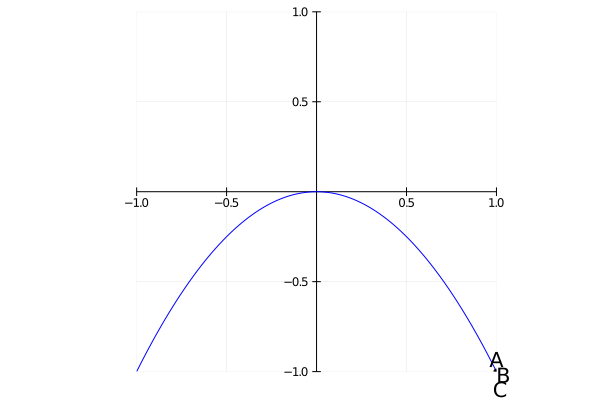

In [16]:
ax, ay, bx, by, cx, cy = nothing, nothing,nothing,nothing,nothing,nothing
anim = @animate for iter ∈ results
    for step ∈ iter
        if length(step) == 3
            aa, bb, cc = step
            ax, ay = aa[2], aa[3]
            bx, by = bb[2], bb[3]
            cx, cy = cc[2], cc[3]
        elseif length(step) == 2
            aa, bb = step
            ax, ay = aa[2], aa[3]
            bx, by = bb[2], bb[3]
        end
        
        # starting plot
        plt = plot(5, xlim=(-1,1), ylim=(-1,1), c=:red, aspect_ratio=1, legend=false, framestyle=:origin)
        plot!(plt, x_axis, y_axis, c=:blue, legend=false)
        scatter!([ax], [ay], c=:black, markerstrokecolor=:black)
        annotate!([ax], [ay], "A", :bottom)
        scatter!([bx], [by], c=:green, markerstrokecolor=:green)
        annotate!([bx], [by], "B", :left)
        scatter!([cx], [cy], c=:red, markerstrokecolor=:red)
        annotate!([cx], [cy], "C", :top)
    end
end
gif(anim, fps=5)

### Reference
* https://www.math.purdue.edu/~allen450/Plotting-Tutorial.html
* https://docs.juliaplots.org/latest/animations/